Take the four features: highway_mpg , engine_size , horsepower , and curb_weight from
the autos.csv file, and:
Perform PCA on those features using numpy.
Perform pairplot of each of the features before and after PCA using
seaborn’s scatterplot method
Plot the explained variance ratio of each of the the newly obtained features
in a bar graph.
Finally compare the results obtained by your code with the result produced
by sci-kit learn library.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
df=pd.read_csv("autos.csv")

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [121]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [122]:
data=df[['engine_size','highway_mpg','curb_weight','horsepower']]

In [123]:
data.dtypes

engine_size    int64
highway_mpg    int64
curb_weight    int64
horsepower     int64
dtype: object

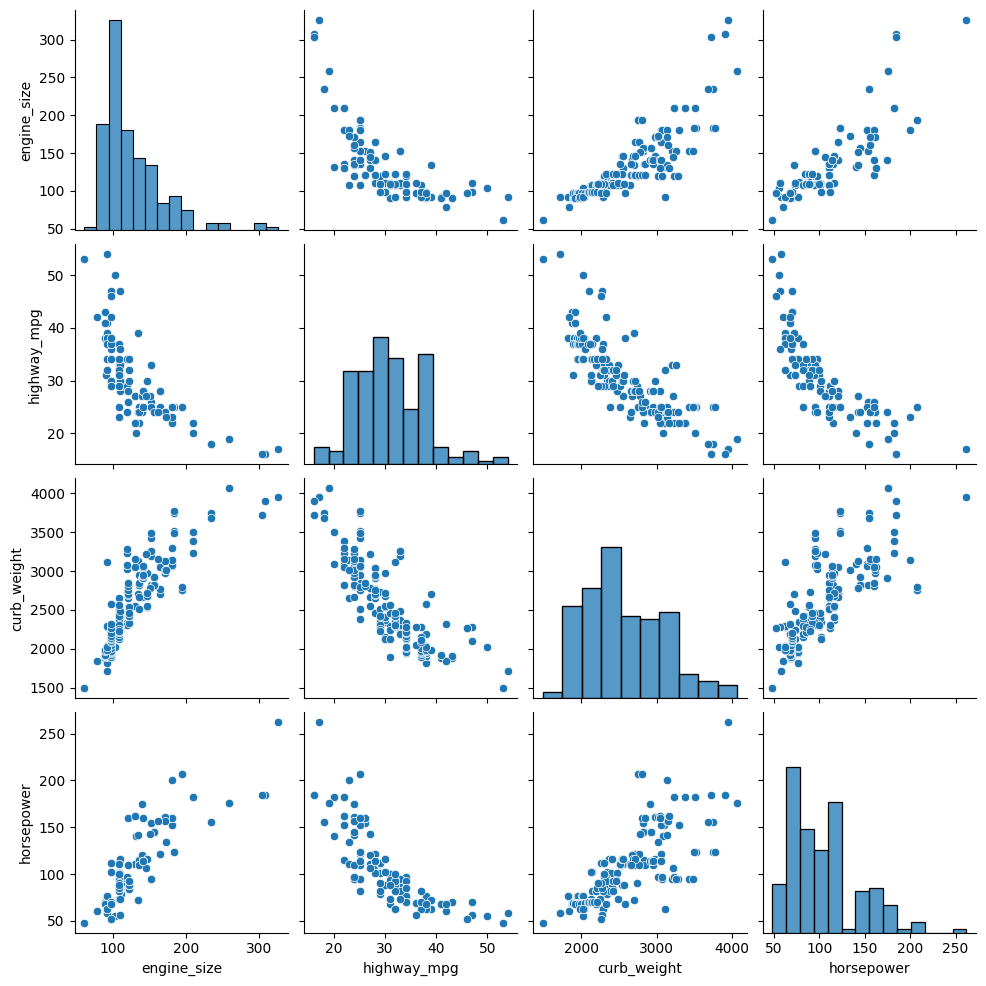

In [124]:
sns.pairplot(data)

### A)USING NUMPY TO CALCULATE PCA

In [125]:
#calculating the centered data
columns=['engine_size','highway_mpg','curb_weight','horsepower']
for column in columns:
    data[column]=data[column].values-data[column].mean()


C:\Users\Acer\AppData\Local\Temp\ipykernel_4508\1381112646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=data[column].values-data[column].mean()


In [126]:
covarience_matrix=np.cov(data,rowvar=False)

In [127]:
covarience_matrix

array([[ 1.72976571e+03, -2.09103654e+02,  1.87773011e+04,
         1.33458039e+03],
       [-2.09103654e+02,  4.64702612e+01, -2.93737594e+03,
        -2.10141893e+02],
       [ 1.87773011e+04, -2.93737594e+03,  2.77412918e+05,
         1.52381863e+04],
       [ 1.33458039e+03, -2.10141893e+02,  1.52381863e+04,
         1.44096972e+03]])

In [128]:
eigen_values,eigen_matrix=np.linalg.eig(covarience_matrix)

In [129]:
v=eigen_matrix[:,[2,0,3,1]]

In [130]:
v

array([[-0.78564508,  0.06759709, -0.04961319, -0.61296898],
       [-0.10507161, -0.01056029,  0.99298799,  0.05313458],
       [ 0.01860601,  0.99614448,  0.00799511,  0.08535845],
       [ 0.60940592,  0.05491161,  0.10700214, -0.78368341]])

In [131]:
DV=np.dot(data,v)

In [132]:
DV

array([[ 3.25464222e+00, -1.28760736e+01, -3.15760286e+00,
        -8.39580449e+00],
       [ 3.25464222e+00, -1.28760736e+01, -3.15760286e+00,
        -8.39580449e+00],
       [ 1.73966290e+01,  2.64922554e+02,  1.55766657e+00,
        -3.21590680e+01],
       [ 1.00274529e+01, -2.25007983e+02, -1.78674973e+00,
        -6.32153552e+00],
       [ 6.63901203e+00,  2.62737834e+02, -5.78556259e+00,
         8.08490862e+00],
       [-2.62133736e+00, -5.33462058e+01, -5.87605969e+00,
        -1.48959008e+01],
       [ 3.64888778e+00,  2.82354485e+02, -3.18170706e+00,
         1.38698985e+01],
       [ 5.69554881e+00,  3.91930378e+02, -2.30224478e+00,
         2.32593285e+01],
       [ 3.08873031e+01,  5.24783614e+02, -2.75369998e+00,
         1.38153143e+01],
       [ 1.13879123e+01, -1.67343552e+02, -2.37341019e+00,
        -2.72273451e-02],
       [ 1.13879123e+01, -1.67343552e+02, -2.37341019e+00,
        -2.72273451e-02],
       [-1.44541296e+01,  1.51336189e+02, -1.48623381e+00,
      

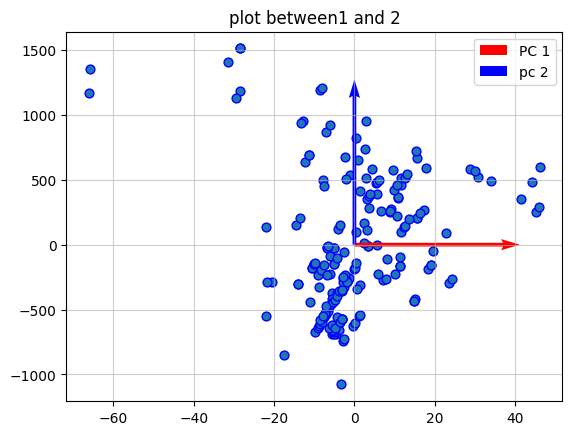

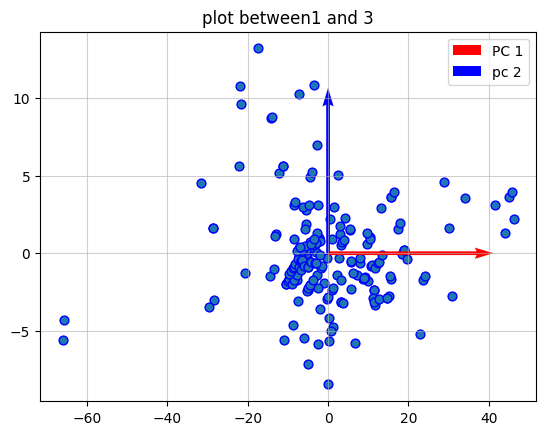

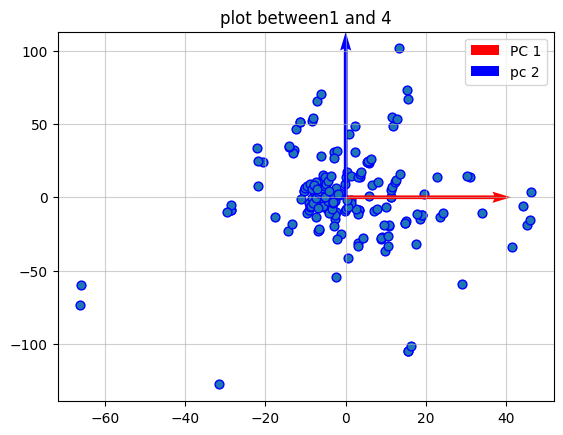

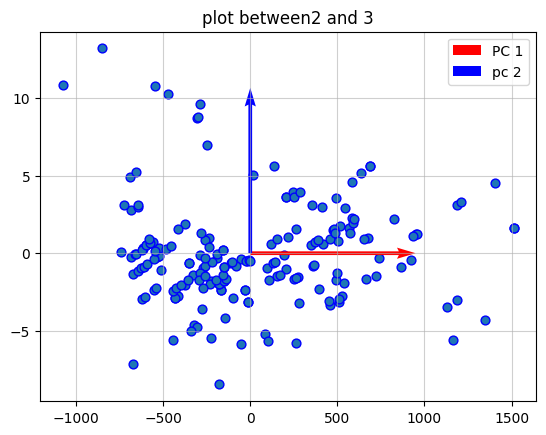

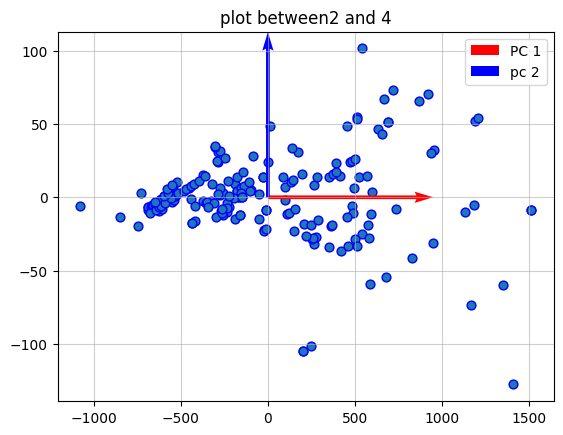

In [133]:
for i in range(2):
    for j in range(1,4):
        if i==j:
            continue
        else:
            plt.scatter(DV[:,i],DV[:,j],s=40,edgecolors='blue')
            plt.quiver(0,0,[1],[0],color='red',scale=3,label='PC 1')
            plt.quiver(0,0,[0],[1],color='blue',scale=3,label='pc 2')
            plt.legend()
            plt.grid(alpha=0.6)
            plt.title(f"plot between{i+1} and {j+1}")
            plt.show()

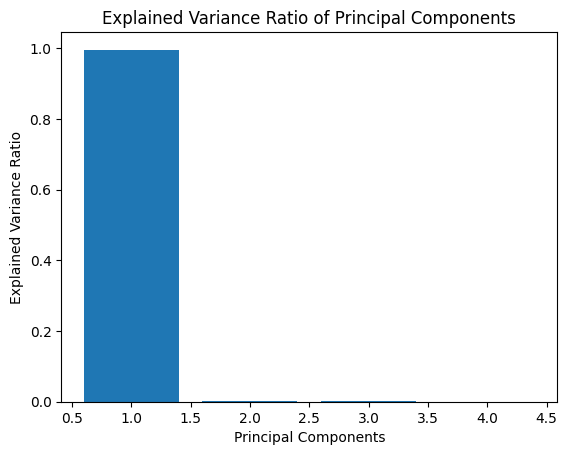

In [134]:
explained_variance_ratio = eigen_values / np.sum(eigen_values)
plt.bar(range(1, 5), explained_variance_ratio[:4])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [135]:
from sklearn.decomposition import PCA

In [136]:
principal=PCA(n_components=4)

In [137]:
principal.fit(data)

PCA(n_components=4)

In [138]:
x=principal.transform(data)

In [139]:
principal.components_

array([[ 0.06759709, -0.01056029,  0.99614448,  0.05491161],
       [ 0.61296898, -0.05313458, -0.08535845,  0.78368341],
       [ 0.78564508,  0.10507161, -0.01860601, -0.60940592],
       [-0.04961319,  0.99298799,  0.00799511,  0.10700214]])

In [140]:
x

array([[-1.28760736e+01,  8.39580449e+00, -3.25464222e+00,
        -3.15760286e+00],
       [-1.28760736e+01,  8.39580449e+00, -3.25464222e+00,
        -3.15760286e+00],
       [ 2.64922554e+02,  3.21590680e+01, -1.73966290e+01,
         1.55766657e+00],
       [-2.25007983e+02,  6.32153552e+00, -1.00274529e+01,
        -1.78674973e+00],
       [ 2.62737834e+02, -8.08490862e+00, -6.63901203e+00,
        -5.78556259e+00],
       [-5.33462058e+01,  1.48959008e+01,  2.62133736e+00,
        -5.87605969e+00],
       [ 2.82354485e+02, -1.38698985e+01, -3.64888778e+00,
        -3.18170706e+00],
       [ 3.91930378e+02, -2.32593285e+01, -5.69554881e+00,
        -2.30224478e+00],
       [ 5.24783614e+02, -1.38153143e+01, -3.08873031e+01,
        -2.75369998e+00],
       [-1.67343552e+02,  2.72273451e-02, -1.13879123e+01,
        -2.37341019e+00],
       [-1.67343552e+02,  2.72273451e-02, -1.13879123e+01,
        -2.37341019e+00],
       [ 1.51336189e+02,  2.31923795e+01,  1.44541296e+01,
      

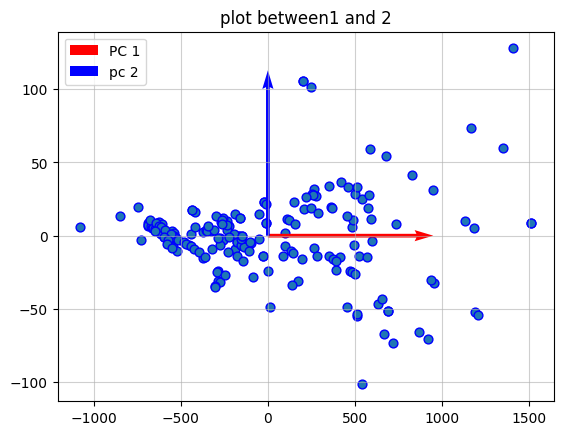

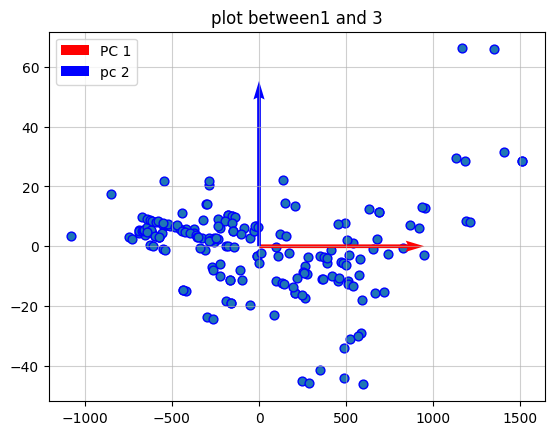

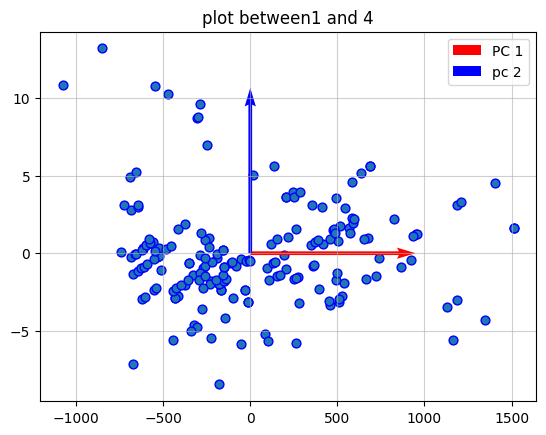

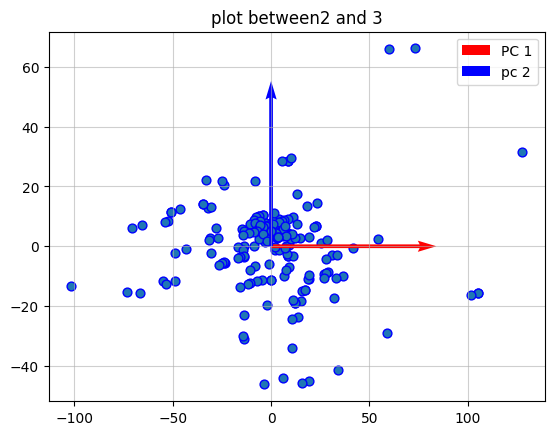

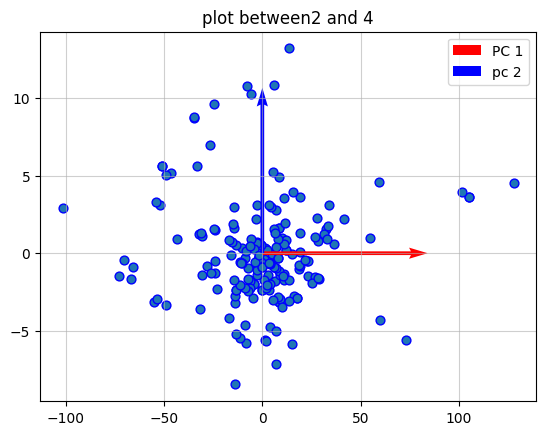

In [141]:
for i in range(2):
    for j in range(1,4):
        if i==j:
            continue
        else:
            plt.scatter(x[:,i],x[:,j],s=40,edgecolors='blue')
            plt.quiver(0,0,[1],[0],color='red',scale=3,label='PC 1')
            plt.quiver(0,0,[0],[1],color='blue',scale=3,label='pc 2')
            plt.legend()
            plt.grid(alpha=0.6)
            plt.title(f"plot between{i+1} and {j+1}")
            plt.show()

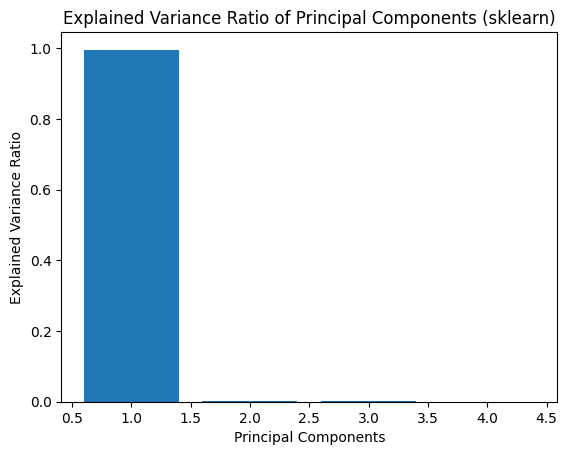

In [142]:
plt.bar(range(1, 5), principal.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components (sklearn)')
plt.show()